In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


## Handwritten digit recognition using SVM¶


In [2]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from random import randint
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix






## Train data 

In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print("Train data shape : ",train_data.shape)
train_data.head()

Train data shape :  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Test data

In [4]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data understanding and exploration


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
print("Train data shape:",train_data.shape)
print("Test data shape:",test_data.shape)

Train data shape: (42000, 785)
Test data shape: (28000, 784)


In [9]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

## Checking unique label

In [11]:
np.unique(train_data.label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Visualizing

Text(0.5, 1.0, 'Number of digit in data')

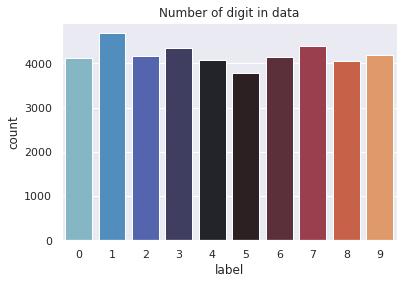

In [13]:
sns.countplot(train_data['label'],palette='icefire')
plt.title('Number of digit in data')

Text(0.5, 1.0, 'Digit 3')

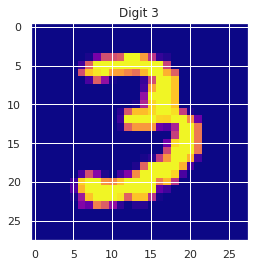

In [14]:
three = train_data.iloc[9, 1:].values.reshape(28,28)
plt.imshow(three, cmap='plasma')
plt.title('Digit 3')

Text(0.5, 1.0, 'Digit 1')

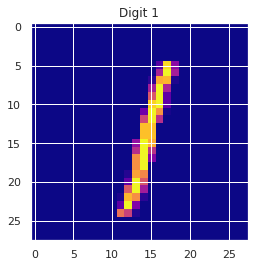

In [15]:
one = train_data.iloc[15, 1:].values.reshape(28,28)
plt.imshow(one, cmap='plasma')
plt.title('Digit 1')

Text(0.5, 1.0, 'Digit 0')

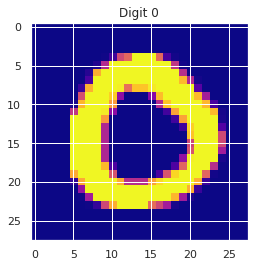

In [16]:
zero = train_data.iloc[4, 1:].values.reshape(28,28)
plt.imshow(zero, cmap='plasma')
plt.title('Digit 0')

## Heat map

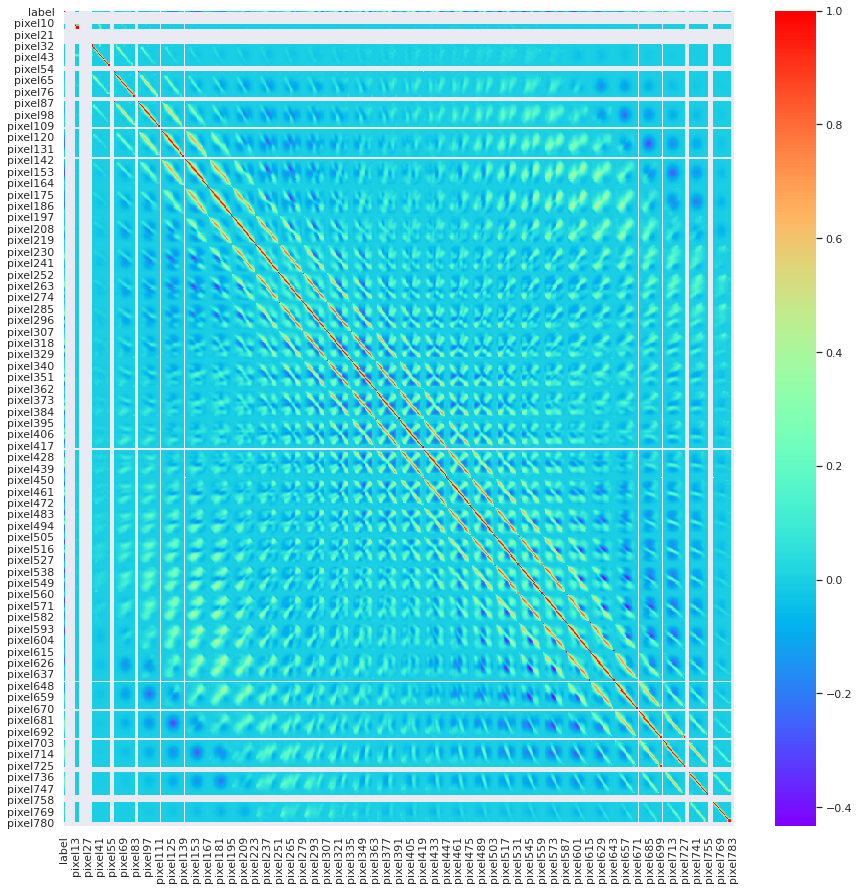

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_data.corr(),annot=False,cmap='rainbow')

Almost all nearby pixel values are correlated


## Examine few pixels¶


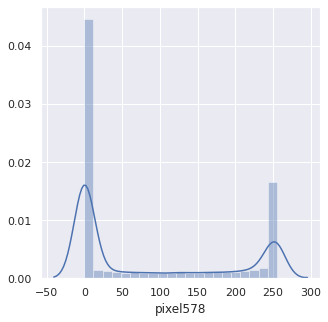

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(train_data['pixel578'])
plt.show()

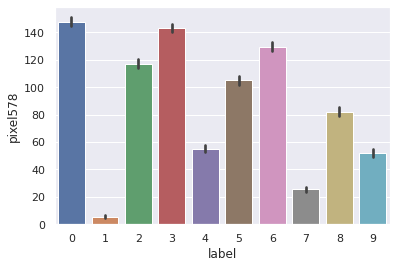

In [19]:
sns.barplot(x='label', y='pixel578', data=train_data)


## Data creating

In [20]:
x = train_data.drop("label",axis = 1)
y = train_data["label"]
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
## Normalization

x = x/255.0
test_data = test_data/255.0

print("x:", x.shape)
print("test_data:", test_data.shape)

x: (42000, 784)
test_data: (28000, 784)


****train test split****

In [22]:
x_scaled = scale(x)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, random_state = 100)

In [23]:
print('X_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_test shape: (8400, 784)
y_test shape: (8400,)


## Model Building
> 1. **first try - Linear model:**

In [24]:
from sklearn import svm
# linear model
model_linear = svm.SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

# confusion matrix and accuracy, precision, recall

In [25]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9182142857142858 

[[826   0   3   1   4   5   4   2   0   0]
 [  0 904   5   1   1   0   0   2   5   2]
 [  5   4 724  18   8   8   7   9  16   2]
 [  2   1  22 754   0  22   1   1  13   7]
 [  2   4   7   1 744   1   7   5   2  22]
 [ 10   5   5  33  10 710   9   3  16   6]
 [  6   3  11   2   7  11 797   0   3   0]
 [  2   4  17   5  14   0   1 800   3  23]
 [  8  22  11  35   7  21   9   3 721   6]
 [  2   3   4  13  38   3   1  49  11 733]]


In [26]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       845
           1       0.95      0.98      0.97       920
           2       0.89      0.90      0.90       801
           3       0.87      0.92      0.89       823
           4       0.89      0.94      0.91       795
           5       0.91      0.88      0.89       807
           6       0.95      0.95      0.95       840
           7       0.92      0.92      0.92       869
           8       0.91      0.86      0.88       843
           9       0.92      0.86      0.88       857

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



**This linear model gives accuracy: 91.82 %**
Let's check Non-lenear models

## Non-Linear model

2. Non-linear Poly kernal

In [27]:
#non linear
non_linear_model_poly = svm.SVC(kernel='poly')
non_linear_model_poly.fit(x_train,y_train)
# predict
y_pred = non_linear_model_poly.predict(x_test)

In [28]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9479761904761905 

[[814   0   3   1   6   3   6   0  12   0]
 [  1 897   8   2   2   0   0   1   8   1]
 [  4   0 745   3   5   2   0   2  38   2]
 [  0   1   5 787   1   6   1   0  19   3]
 [  0   2   4   0 763   2   0   0   4  20]
 [  0   0   0  10   5 754   6   0  24   8]
 [  1   2   1   1   8   5 814   0   8   0]
 [  0   3   9   2  20   0   0 791   9  35]
 [  0   4   3   7   5   7   0   4 810   3]
 [  3   1   1   6  28   0   0   8  22 788]]


3. Non-linear rbf kernal

In [29]:
#non linear
non_linear_model_rbf = svm.SVC(kernel='rbf')
non_linear_model_rbf.fit(x_train,y_train)
# predict
y_pred = non_linear_model_rbf.predict(x_test)

In [30]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9597619047619048 

[[831   0   4   2   2   2   3   1   0   0]
 [  0 901   9   1   2   0   0   2   3   2]
 [  6   0 771   8   3   0   1   4   6   2]
 [  0   2   8 793   1   6   1   3   6   3]
 [  0   1   8   0 762   1   3   3   2  15]
 [  1   1   9  10   2 769  11   0   3   1]
 [  2   1   9   0   3   2 822   0   1   0]
 [  1   4  21   1   6   0   0 824   1  11]
 [  2   6   7  12   2   5   6   4 796   3]
 [  3   1   6   6  14   1   1  26   6 793]]


So the best test score is 0.9597619047619048 corresponding to Non-linear rbf kernal

## Visualizing unseen dataset

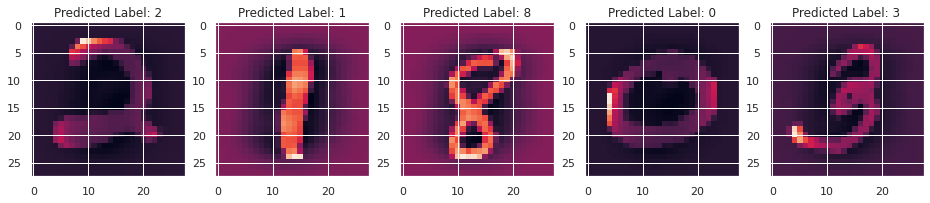

In [32]:
df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = x_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

## Final model on test data(/kaggle/input/digit-recognizer/test.csv)

In [42]:
#shape
print("Trian data shape: ",train_data.shape)
print("Test data shape: ",test_data.shape)

Trian data shape:  (42000, 785)
Test data shape:  (28000, 784)


In [44]:
#scaling test data
scaled_test = scale(test_data)
scaled_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
#model predict using rbf 
import time
start_time = time.time()

test_predict = non_linear_model_rbf.predict(scaled_test)

scoretime = time.time() - start_time
print("Time consumed to predict model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))

Time consumed to predict model:  00:06:33


# visualize few of predicted test numbers

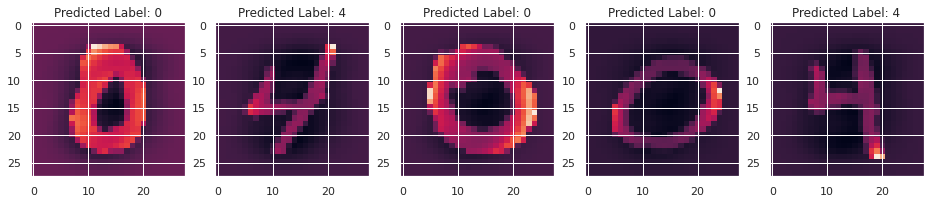

In [48]:
# visualize few of predicted test numbers

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = scaled_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

## Exporting the predicted values 

In [52]:
# Exporting the predicted values 
data_to_submit = pd.DataFrame({
    'ImageId':test_data.index.values+1,
    'Label':test_predict
})
data_to_submit.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
